Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collection & Pre-Processing

In [3]:
# loading the data from csv file to a pandas Dataframe
raw_mail_data = pd.read_csv('data\mail_data.csv')

<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
C:\Users\athar\AppData\Local\Temp\ipykernel_18308\4042616053.py:2: SyntaxWarning: invalid escape sequence '\m'
  raw_mail_data = pd.read_csv('data\mail_data.csv')


In [4]:
print(raw_mail_data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [5]:
# replace the null values with a null string
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')

In [6]:
# printing the first 5 rows of the dataframe
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# checking the number of rows and columns in the dataframe
mail_data.shape

(5572, 2)

Label Encoding

In [8]:
# label spam mail as 0;  ham mail as 1;

mail_data.loc[mail_data['Category'] == 'spam', 'Category',] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category',] = 1

spam  -  0

ham  -  1

In [9]:
# separating the data as texts and label

X = mail_data['Message']

Y = mail_data['Category']

In [10]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [11]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


Splitting the data into training data & test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [27]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


Feature Extraction

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Correct lowercase usage (boolean not string)
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [16]:
print(X_train)

3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object


In [17]:
print(X_train_features)

  (0, 2329)	0.38783870336935383
  (0, 3811)	0.34780165336891333
  (0, 2224)	0.413103377943378
  (0, 4456)	0.4168658090846482
  (0, 5413)	0.6198254967574347
  (1, 3811)	0.17419952275504033
  (1, 3046)	0.2503712792613518
  (1, 1991)	0.33036995955537024
  (1, 2956)	0.33036995955537024
  (1, 2758)	0.3226407885943799
  (1, 1839)	0.2784903590561455
  (1, 918)	0.22871581159877646
  (1, 2746)	0.3398297002864083
  (1, 2957)	0.3398297002864083
  (1, 3325)	0.31610586766078863
  (1, 3185)	0.29694482957694585
  (1, 4080)	0.18880584110891163
  (2, 6601)	0.6056811524587518
  (2, 2404)	0.45287711070606745
  (2, 3156)	0.4107239318312698
  (2, 407)	0.509272536051008
  (3, 7414)	0.8100020912469564
  (3, 2870)	0.5864269879324768
  (4, 2870)	0.41872147309323743
  (4, 487)	0.2899118421746198
  :	:
  (4454, 2855)	0.47210665083641806
  (4454, 2246)	0.47210665083641806
  (4455, 4456)	0.24920025316220423
  (4455, 3922)	0.31287563163368587
  (4455, 6916)	0.19636985317119715
  (4455, 4715)	0.30714144758811196
  (

Training the Model

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [29]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

In [39]:
for name, model in models.items():
    model.fit(X_train_features, Y_train)
    print(f"Trained {name}")

Trained Logistic Regression
Trained Naive Bayes
Trained Random Forest


Evaluating the trained model

In [40]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [41]:
# Select model
model = models["Logistic Regression"]

In [42]:
# Training accuracy
train_pred = model.predict(X_train_features)
train_acc = accuracy_score(Y_train, train_pred)
print("Logistic Regression - Training Accuracy:", train_acc)

Logistic Regression - Training Accuracy: 0.9676912721561588


In [43]:
# Test accuracy
test_pred = model.predict(X_test_features)
test_acc = accuracy_score(Y_test, test_pred)
print("Logistic Regression - Test Accuracy:", test_acc)

Logistic Regression - Test Accuracy: 0.9668161434977578


In [44]:
# Classification report
print(classification_report(Y_test, test_pred))

              precision    recall  f1-score   support

           0       1.00      0.76      0.86       155
           1       0.96      1.00      0.98       960

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



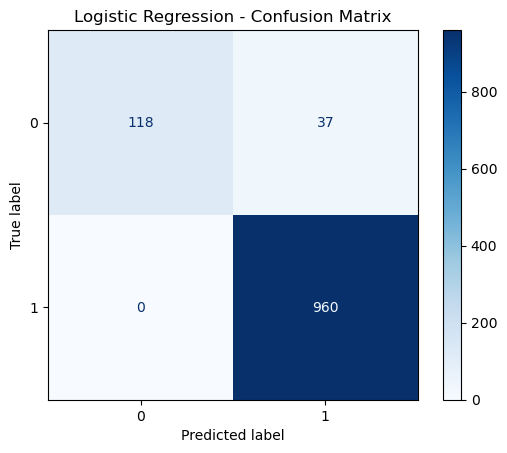

In [45]:
# Confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test_features, Y_test, cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

In [46]:
model = models["Naive Bayes"]

In [47]:
train_pred = model.predict(X_train_features)
train_acc = accuracy_score(Y_train, train_pred)
print("Naive Bayes - Training Accuracy:", train_acc)

Naive Bayes - Training Accuracy: 0.9807045097599282


In [48]:
test_pred = model.predict(X_test_features)
test_acc = accuracy_score(Y_test, test_pred)
print("Naive Bayes - Test Accuracy:", test_acc)

Naive Bayes - Test Accuracy: 0.9730941704035875


In [49]:
print(classification_report(Y_test, test_pred))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89       155
           1       0.97      1.00      0.98       960

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



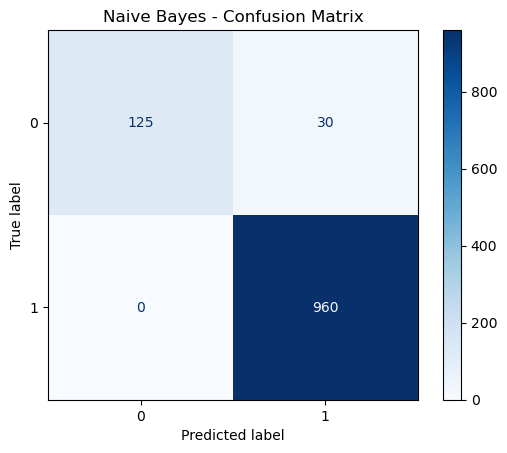

In [50]:
ConfusionMatrixDisplay.from_estimator(model, X_test_features, Y_test, cmap="Blues")
plt.title("Naive Bayes - Confusion Matrix")
plt.show()

In [51]:
model = models["Random Forest"]

In [52]:
train_pred = model.predict(X_train_features)
train_acc = accuracy_score(Y_train, train_pred)
print("Random Forest - Training Accuracy:", train_acc)

Random Forest - Training Accuracy: 1.0


In [53]:
test_pred = model.predict(X_test_features)
test_acc = accuracy_score(Y_test, test_pred)
print("Random Forest - Test Accuracy:", test_acc)

Random Forest - Test Accuracy: 0.9766816143497757


In [54]:
print(classification_report(Y_test, test_pred))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91       155
           1       0.97      1.00      0.99       960

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



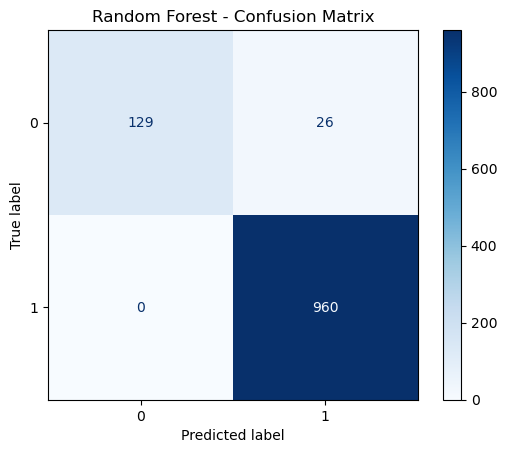

In [55]:
ConfusionMatrixDisplay.from_estimator(model, X_test_features, Y_test, cmap="Blues")
plt.title("Random Forest - Confusion Matrix")
plt.show()

Building a Predictive System

In [58]:
#input_mail = ["Hi! How are you?....Is everything fine there?"]
input_mail = ["Congratulations! You've won a free gift card! Claim it now by texting us on 9898346510"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

[0]
Spam mail


In [65]:
import joblib

# Save the trained vectorizer and models
joblib.dump(feature_extraction, 'models/vectorizer.pkl')
joblib.dump(models['Naive Bayes'], 'models/naive_model.pkl')
joblib.dump(models['Logistic Regression'], 'models/logistic_model.pkl')
joblib.dump(models['Random Forest'], 'models/rf_model.pkl')


['models/rf_model.pkl']